In [3]:
import statistics
import scipy.stats as stats
import math
import matplotlib
import statsmodels.api as sm
from scipy.stats import erlang
from scipy.stats import pearsonr
# matplotlib.use('Agg') # 设置后端为Agg（非交互式）
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def read_nums(fname:str)->[]:
  data_array = []
  try:
    with open(fname, 'r') as file:
      # 逐行读取文件内容
      for line in file:
        # 去除换行符并使用逗号分割
        line_data = line.strip().split(',')
        # 将分割后的数据添加到数组
        for n in line_data:
          data_array.append(float(n))
  except FileNotFoundError:
    print(f"File not found: {file}")
    return None
  return data_array


def cut(n: int, array: [])->[]:
  return array[0:n]


def math_expectation(nums:[])->float:
  return statistics.mean(nums)


def math_variance(nums:[]) -> float:
  aver = math_expectation(nums)
  result = 0
  for i in nums:
    result = (aver - i)**2 + result
  result = result/(len(nums)-1)
  return result


def math_standard_deviation(nums:[]) -> float:
  return math.sqrt(math_variance(nums))


def math_coeff_var(nums:[]) -> float:
  return math_standard_deviation(nums)/math_expectation(nums)


def math_margin_of_error(nums: [], level: float)->float:
  z_critical = stats.norm.ppf((1 + level) / 2)
  # 计算置信区间
  margin_of_error = z_critical * (math_standard_deviation(nums) / math.sqrt(len(nums)))
  return margin_of_error


def lab_solve(nums:[], size: int):
  real_math_exception = math_expectation(nums)
  real_deviation = math_standard_deviation(nums)
  real_coeff_var = math_coeff_var(nums)
  real_variance = math_variance(nums)
  real_level_95 = math_margin_of_error(nums, 0.95)
  real_level_99 = math_margin_of_error(nums, 0.99)
  real_level_90 = math_margin_of_error(nums, 0.90)
  nums = nums[0:size]
  exp_math_exception = math_expectation(nums)
  exp_deviation = math_standard_deviation(nums)
  exp_coeff_var = math_coeff_var(nums)
  exp_variance = math_variance(nums)
  exp_level_95 = math_margin_of_error(nums, 0.95)
  exp_level_99 = math_margin_of_error(nums, 0.99)
  exp_level_90 = math_margin_of_error(nums, 0.90)
  print("Count of elements:" + str(size))
  print("математическое ожидание: %.2f" % exp_math_exception)
  print("percentage: %.2f"%((exp_math_exception-real_math_exception)*100/real_math_exception))
  print("дисперсия: %.2f"%exp_variance)
  print("percentage: %.2f"%((exp_variance-real_variance)*100/real_variance))
  print("среднеквадратическое отклонение: %.2f"% exp_deviation)
  print("percentage: %.2f"%((exp_deviation-real_deviation)*100/real_deviation))
  print("коэффициент вариации: %.2f" % (exp_coeff_var))
  print("percentage: %.2f" %((exp_coeff_var-real_coeff_var)*100/real_coeff_var))
  print("доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:")
  print("%.2f"%exp_level_90)
  print("percentage: %.2f" %((exp_level_90-real_level_90)*100/real_level_90))
  print("%.2f"%exp_level_95)
  print("percentage: %.2f" %((exp_level_95-real_level_95)*100/real_level_95))
  print("%.2f"%exp_level_99)
  print("percentage: %.2f" %((exp_level_99-real_level_99)*100/real_level_99))
  print("")


def factorial_iterative(n):
  result = 1
  for i in range(1, n + 1):
    result *= i
  return result

Count of elements:10
математическое ожидание: 23.50
percentage: 3.50
дисперсия: 1624.18
percentage: 6.96
среднеквадратическое отклонение: 40.30
percentage: 3.42
коэффициент вариации: 1.71
percentage: -0.08
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
20.96
percentage: 466.45
24.98
percentage: 466.45
32.83
percentage: 466.45

Count of elements:20
математическое ожидание: 17.04
percentage: -24.96
дисперсия: 951.82
percentage: -37.32
среднеквадратическое отклонение: 30.85
percentage: -20.83
коэффициент вариации: 1.81
percentage: 5.51
доверительные интервалы для оценки математического ожидания с доверительными вероятностями 0,9; 0,95 и 0,99:
11.35
percentage: 206.63
13.52
percentage: 206.63
17.77
percentage: 206.63

Count of elements:50
математическое ожидание: 22.25
percentage: -2.02
дисперсия: 1094.83
percentage: -27.90
среднеквадратическое отклонение: 33.09
percentage: -15.09
коэффициент вариации: 1.49
percentage: -13.34
до

C:\Users\Tolia\AppData\Local\Temp\ipykernel_67560\1597276302.py:30: RuntimeWarning: divide by zero encountered in reciprocal
  erlan_y = (k*a*(k*a*erlan_x)**(k-1)/factorial_iterative(k-1))*np.exp(-k*a*erlan_x)
C:\Users\Tolia\AppData\Local\Temp\ipykernel_67560\1597276302.py:30: RuntimeWarning: invalid value encountered in multiply
  erlan_y = (k*a*(k*a*erlan_x)**(k-1)/factorial_iterative(k-1))*np.exp(-k*a*erlan_x)


ZeroDivisionError: float division by zero

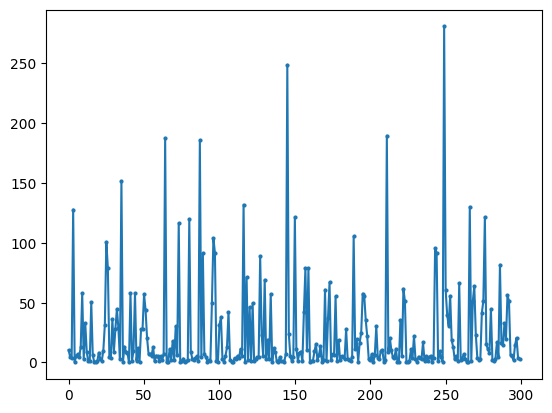

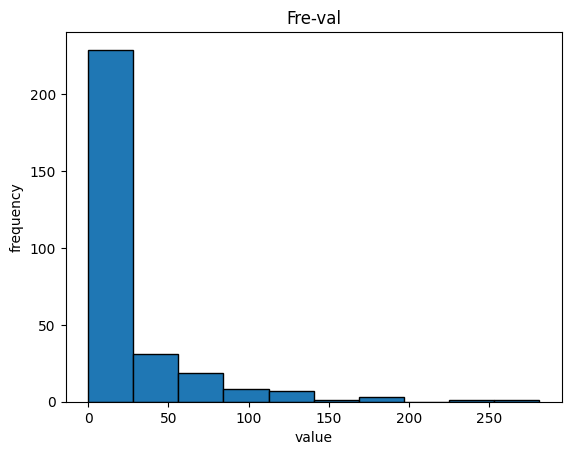

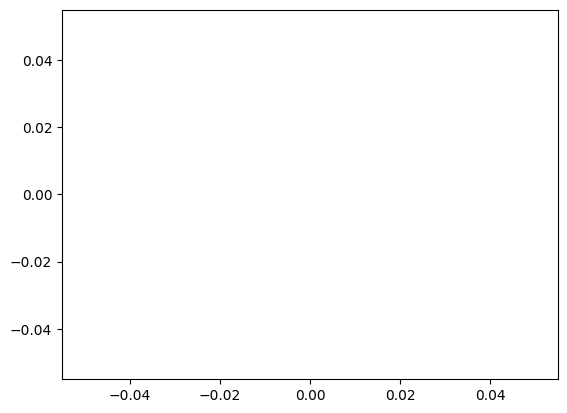

In [10]:
  nums = read_nums("./nums.csv")
  lab_solve(nums,10)
  lab_solve(nums,20)
  lab_solve(nums,50)
  lab_solve(nums,100)
  lab_solve(nums,200)
  lab_solve(nums,300)

  plt.figure() # 创建第一个图的窗口
  np_nums = np.array(nums)
  x = np.arange(len(nums))
  plt.plot(x,np_nums, marker='o',markersize=2)
  # 保存图形到文件
  plt.savefig('1.png')

  plt.figure()
  # 绘制频率直方图
  plt.hist(nums, bins=10, edgecolor='black') # 使用20个箱子（bin）进行直方图绘制
  # 添加标题和标签
  plt.title('Fre-val')
  plt.xlabel('value')
  plt.ylabel('frequency')
  # 显示图形
  plt.savefig('2.png')

  ###################################################################
  k = round(1/math_coeff_var(nums)**2)
  a = 1/math_expectation(nums)
  erlan_x = np.arange(300)
  erlan_y = (k*a*(k*a*erlan_x)**(k-1)/factorial_iterative(k-1))*np.exp(-k*a*erlan_x)
  plt.figure()
  plt.plot(erlan_x,erlan_y,marker='o',markersize=1)
  plt.savefig('3.png')

  random_values = erlang.rvs(k, scale=1/(k*a), size=300)
  random_x_axis = np.arange(300)
  plt.figure()
  plt.plot(random_x_axis,random_values, marker='o',markersize=2)
  plt.savefig('4.png')

  plt.figure()
  # 绘制频率直方图
  # 组合数据
  data_combined = [nums, random_values]
  width = 50
  # 绘制直方图
  plt.hist(data_combined, bins=10,
           alpha=1, color=['b', 'r'], label=['Data 1', 'Data 2'])

  # 添加标题和标签
  plt.title('frequency')
  plt.xlabel('value')
  plt.ylabel('frequency')
  # 显示图形
  plt.savefig('5.png')

  n = 300
  acf_values, conf_int = sm.tsa.acf(nums, nlags=n-1, alpha=0.05)
  # 绘制自相关图
  lags = np.arange(n)
  plt.figure()
  plt.plot(lags, acf_values)
  plt.xlabel(' (Lag)')
  plt.ylabel('(ACF)')
  plt.title('(Autocorrelation Plot)')
  plt.savefig("6.png")
  lab_solve(random_values, 10)
  lab_solve(random_values, 20)
  lab_solve(random_values, 50)
  lab_solve(random_values, 100)
  lab_solve(random_values, 200)
  lab_solve(random_values, 300)

  new_nums = random_values
  acf_values1, conf_int1 = sm.tsa.acf(new_nums, nlags=n-1, alpha=0.05)
  # 绘制自相关图
  lags = np.arange(n)
  plt.figure()
  plt.plot(lags, acf_values1)
  plt.xlabel(' (Lag)')
  plt.ylabel('(ACF)')
  plt.title('(Autocorrelation Plot)')
  plt.savefig("./7.png")